In [1]:
from demo import np_to_torch,  scale_input, pred
from dataloader import read_image
from networks.models import build_model
import torch
import numpy as np
import cv2
import matplotlib.pyplot as plt
import time

In [2]:
class Args:
  encoder = 'resnet50_GN_WS'
  decoder = 'InteractiveSegNet'
  use_mask_input = True
  use_usr_encoder = True
  weights = 'InterSegSynthFT.pth'
args=Args()
model = build_model(args)


modifying input layer


In [13]:
image = read_image('./GrabCut/images/24077.png')

# Interactive

<IPython.core.display.Javascript object>


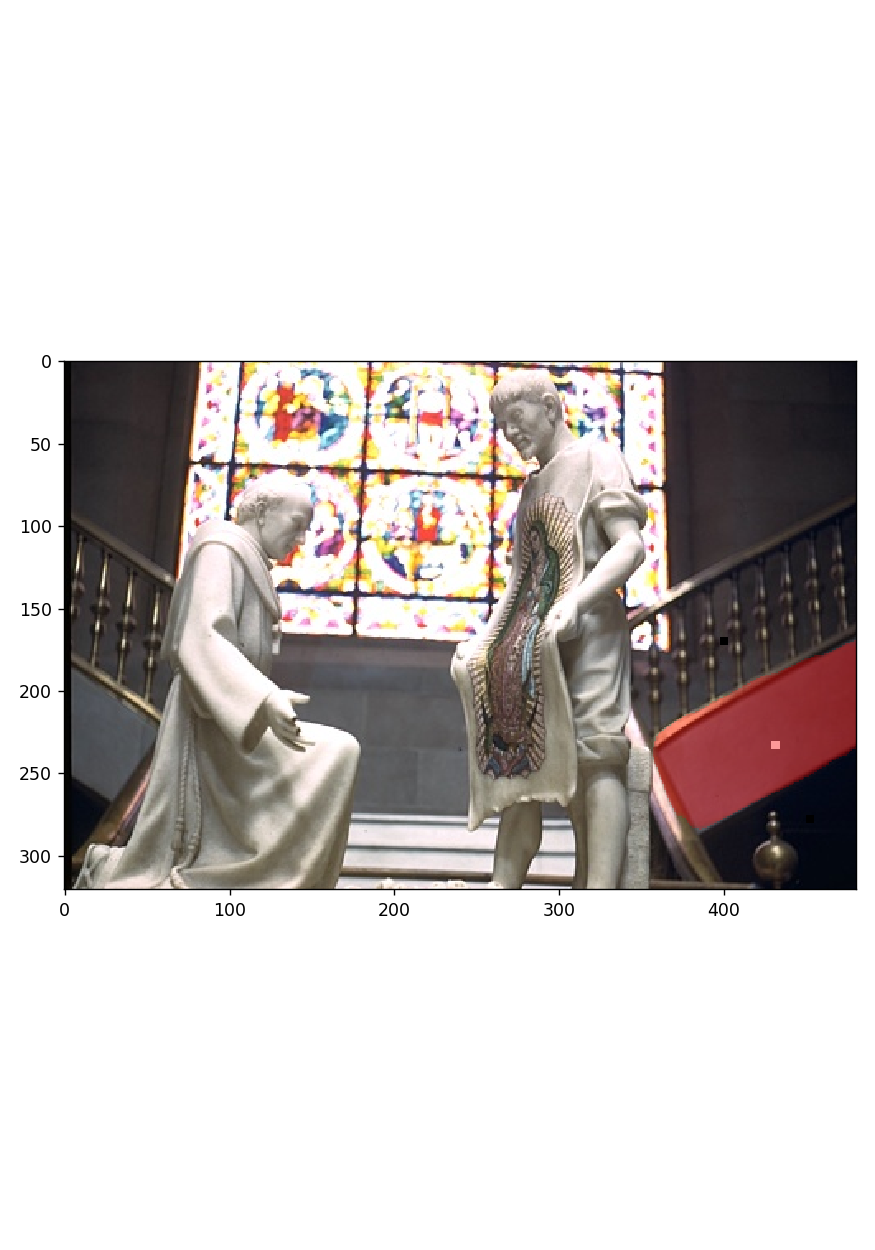

In [19]:
%matplotlib notebook
import matplotlib.pyplot as plt
import numpy as np
from ipywidgets import interact, interactive, fixed, interact_manual
import ipywidgets as widgets
global alpha


a = image.copy()
h,w,c = image.shape
trimap = np.zeros((h,w,2))
alpha = np.zeros((h,w))
fig  = plt.figure(figsize=(7, 10))
ax = fig.gca()
ax.imshow(a)
fig.tight_layout()



def onclick(event):
    global alpha
    x = min(max(int(np.round(event.xdata)),0), a.shape[1])
    y = min(max(int(np.round(event.ydata)),0), a.shape[0])
    v = int(event.button==1)
    trimap[y,x,v] = 1
    a[y-2:y+2+1,x-2:x+2+1] = v
    for i in range(1):
        alpha =  pred(image, trimap, alpha, model)
    disp_im = (1-0.4*alpha[:,:,None])*a + 0.4*alpha[:,:,None]*np.array((1,0,0))
    ax.imshow(disp_im, vmin=0, vmax=1)



    
# Create an hard reference to the callback not to be cleared by the garbage collector
ka = fig.canvas.mpl_connect('button_press_event', onclick)